## Import libraries

In [1]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
import gym
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from collections import deque

Using TensorFlow backend.


## Set variables

In [7]:
learning_rate = 5e-4
state_size = 4
action_size = 2

memory_size = 10000
batch_size = 32

gamma = 0.99
alpha = 0.1

## Import environment

In [3]:
env = gym.make('CartPole-v0')

[2018-04-19 11:30:02,149] Making new env: CartPole-v0


## Setup model

In [11]:
q_network = Sequential()

q_network.add(Dense(64, activation='tanh', input_dim=state_size))
q_network.add(Dense(action_size, activation='linear'))

optimizer = Adam(lr=learning_rate)
q_network.compile(loss='mse', optimizer=optimizer)

## Train model

In [12]:
rewards_list = []
epsilon = 1.0
epsilon_decay = 0.986

memory = deque(maxlen=memory_size)

start_time = time.time()
solved = False
solved_count = 0
episode = 0

#for episode in range(200):
while not solved:
    
    state = env.reset()
    state = np.reshape(state, [1, 4])
    total_reward = 0
    episode += 1
    
    done = False
    
    if (epsilon > 0.02):
        epsilon *= epsilon_decay
    
    while not done:
        
        #env.render()
        
        # Choose action
        if epsilon > np.random.rand():
            action = env.action_space.sample()
        else:
            action = np.argmax(q_network.predict(state)[0])
        
        # Apply action to environment, get next state/reward, and save to memory object
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, 4])
        total_reward += reward
        
        if done:
            next_state = np.zeros(state.shape) # end of episode flag
            
            if (total_reward == 200):
                solved_count += 1
            else:
                solved_count = 0
                
            if (solved_count == 100):
                solved = True
            
        memory.append((state, action, reward, next_state))
        state = next_state

        # Train model
        if (len(memory) >= batch_size):
            
            minibatch = random.sample(list(memory), batch_size)
            
            x_train = np.zeros((batch_size, 4))
            y_train = np.zeros((batch_size, 2))
            
            for i, (mb_state, mb_action, mb_reward, mb_next_state) in enumerate(minibatch):
                
                x_train[i] = mb_state
                y_train[i] = q_network.predict(np.reshape(mb_state, [1,4]))
                
                if (np.array_equal(mb_next_state, np.zeros(state.shape))): # end of episode flag
                    q_target = mb_reward
                    
                else:
                    q_target = mb_reward + (gamma * np.max(q_network.predict(mb_next_state)))

                q_predict = y_train[i][mb_action]
                y_train[i][mb_action] += alpha * (q_target - q_predict)
                            
            q_network.fit(x_train, y_train, epochs=1, verbose=0)

            
    if (episode % 1 == 0):
        print('Episode: {}'.format(episode),
              'Total reward: {}'.format(total_reward),
              'Explore P: {:.4f}'.format(epsilon),
              'Solved: {}'.format(solved_count))
                
    rewards_list.append((episode, total_reward))
    
env.render(close=True)

print("Total time:", round((time.time() - start_time), 0), "secs")

Episode: 1 Total reward: 34.0 Explore P: 0.9860 Solved: 0
Episode: 2 Total reward: 27.0 Explore P: 0.9722 Solved: 0
Episode: 3 Total reward: 41.0 Explore P: 0.9586 Solved: 0
Episode: 4 Total reward: 41.0 Explore P: 0.9452 Solved: 0
Episode: 5 Total reward: 55.0 Explore P: 0.9319 Solved: 0
Episode: 6 Total reward: 36.0 Explore P: 0.9189 Solved: 0
Episode: 7 Total reward: 14.0 Explore P: 0.9060 Solved: 0
Episode: 8 Total reward: 18.0 Explore P: 0.8933 Solved: 0
Episode: 9 Total reward: 37.0 Explore P: 0.8808 Solved: 0
Episode: 10 Total reward: 25.0 Explore P: 0.8685 Solved: 0
Episode: 11 Total reward: 18.0 Explore P: 0.8563 Solved: 0
Episode: 12 Total reward: 28.0 Explore P: 0.8444 Solved: 0
Episode: 13 Total reward: 13.0 Explore P: 0.8325 Solved: 0
Episode: 14 Total reward: 15.0 Explore P: 0.8209 Solved: 0
Episode: 15 Total reward: 18.0 Explore P: 0.8094 Solved: 0
Episode: 16 Total reward: 11.0 Explore P: 0.7981 Solved: 0
Episode: 17 Total reward: 13.0 Explore P: 0.7869 Solved: 0
Episod

Episode: 140 Total reward: 183.0 Explore P: 0.1389 Solved: 0
Episode: 141 Total reward: 118.0 Explore P: 0.1370 Solved: 0
Episode: 142 Total reward: 200.0 Explore P: 0.1351 Solved: 1
Episode: 143 Total reward: 200.0 Explore P: 0.1332 Solved: 2
Episode: 144 Total reward: 125.0 Explore P: 0.1313 Solved: 0
Episode: 145 Total reward: 200.0 Explore P: 0.1295 Solved: 1
Episode: 146 Total reward: 200.0 Explore P: 0.1277 Solved: 2
Episode: 147 Total reward: 200.0 Explore P: 0.1259 Solved: 3
Episode: 148 Total reward: 200.0 Explore P: 0.1241 Solved: 4
Episode: 149 Total reward: 200.0 Explore P: 0.1224 Solved: 5
Episode: 150 Total reward: 200.0 Explore P: 0.1207 Solved: 6
Episode: 151 Total reward: 200.0 Explore P: 0.1190 Solved: 7
Episode: 152 Total reward: 200.0 Explore P: 0.1173 Solved: 8
Episode: 153 Total reward: 200.0 Explore P: 0.1157 Solved: 9
Episode: 154 Total reward: 200.0 Explore P: 0.1140 Solved: 10
Episode: 155 Total reward: 200.0 Explore P: 0.1124 Solved: 11
Episode: 156 Total rew

## Plot training results

Text(0,0.5,'Total Reward')

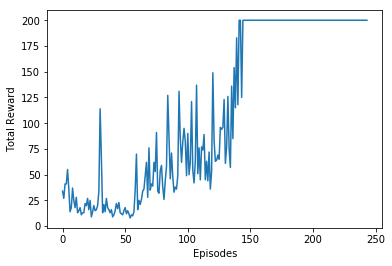

In [13]:
eps, rews = np.array(rewards_list).T
plt.plot(rews)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')

## Test model

In [14]:
for episode in range(5):
    
    counter = 0
    done = False
    state = env.reset()

    while not done:
        env.render()
        state = np.reshape(state, [1, 4])
        action = np.argmax(q_network.predict(state)[0])
        state, reward, done, _ = env.step(action)
        counter += 1

    print(episode + 1, counter)
                
env.render(close=True)

1 200
2 200
3 200
4 200
5 200
